In [1]:
import numpy as np
import torch
from torch.nn import functional as F
import matplotlib.pyplot as plt
import os.path
import pickle
from copy import deepcopy as copy

In [2]:
data_path = 'data_4_surrogate.pickle'

In [3]:
ap1_x,ap1_y = 4e-3, 5.5e-3
ang = np.arange(0.0,2*np.pi,2*np.pi/1024)
c = np.cos(ang)
s = np.sin(ang)

In [4]:
nx = 50
testP = 0.0
sig = 0.015
k=0
pTest = []
for x in np.linspace(-ap1_x*0.95,ap1_x*0.95,nx):
    for y in np.linspace(-ap1_y*0.95,ap1_y*0.95,nx):
        circ = np.sqrt((x/ap1_x)**2 + (y/ap1_y)**2)
        arcR = np.sqrt(((x-1.3*ap1_x)/ap1_x)**2 + (y/(1.1*ap1_y))**2)
        arcL = np.sqrt(((x+1.3*ap1_x)/ap1_x)**2 + (y/(1.1*ap1_y))**2)
        if circ < 0.95 and y>0:
            if x> 0 and 0.6 < arcR and (circ > 0.75 or  arcR < 0.8):
                pTest.append([x,y])
                k=k+1
            elif x<0 and 0.6 < arcL and (circ > 0.75 or  arcL < 0.8):
                pTest.append([x,y])
                k=k+1
pTest0 = np.array(pTest)
pTest1 = copy(pTest0)
pTest2 = copy(pTest0)
pTest = np.concatenate((pTest0,pTest1,pTest2))
npt = len(pTest0)
npt

352

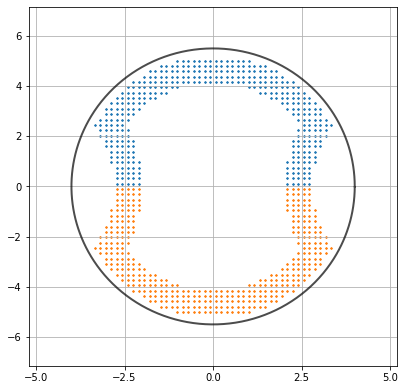

In [5]:
fig = plt.figure(figsize=[3.3*2,3.3*2])
plt.scatter(pTest[:,0]*1e3, pTest[:,1]*1e3,s=1)
plt.scatter(pTest[:,0]*1e3,-pTest[:,1]*1e3,s=1)
plt.plot(ap1_x*c*1e3,ap1_y*s*1e3,alpha=0.7,c='k',lw=2)
plt.xticks([-5,-2.5,0,2.5,5])
plt.xlim(-ap1_x*1.3*1e3,ap1_x*1.3*1e3)
plt.ylim(-ap1_y*1.3*1e3,ap1_y*1.3*1e3)
plt.grid()

In [6]:
data = pickle.load(open(data_path,'rb'))
data.keys()

dict_keys(['regular', 'chaotic'])

In [7]:
data['regular'].keys()

dict_keys(['inputs', 'outputs'])

In [8]:
len(data['regular']['inputs']) + len(data['chaotic']['inputs'])

7000

In [9]:
i=0
output = data['regular']['outputs'][i]
indx = output[:3]
diff = output[3:]
diffSum0 = np.array([np.sum(diff[i]) for i in range(3)]) 
diffSum1 = diffSum0+ np.array([np.max(diff[i])*(npt-len(indx[i])) for i in range(3)])

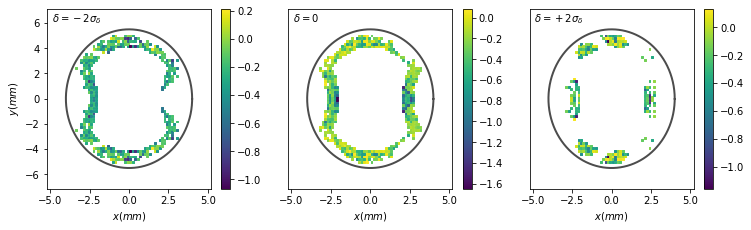

In [10]:
txt = [r'$\delta=-2\sigma_{\delta}$',r'$\delta=0$',r'$\delta=+2\sigma_{\delta}$']
fig = plt.figure(figsize=[4+3.3+3.3,3.3])
for i in range(3):
    plt.subplot(1,3,i+1)
    d = np.log10(diff[i])
    x = pTest[indx[i],0]
    y = pTest[indx[i],1]
    f1=plt.scatter(x*1e3,y*1e3,c=d,s=3.5,marker='s')
    plt.scatter(x*1e3,-y*1e3,c=d,s=3.5,marker='s')
    plt.plot(ap1_x*c*1e3,ap1_y*s*1e3,alpha=0.7,c='k',lw=2)
    plt.xlim(-ap1_x*1.3*1e3,ap1_x*1.3*1e3)
    plt.ylim(-ap1_y*1.3*1e3,ap1_y*1.3*1e3)
    plt.xlabel('$x (mm)$')
    if i==0:
        plt.ylabel('$y (mm)$')
    else:
        plt.yticks([])
    plt.text(-4.9,6.1,txt[i])
    plt.colorbar(f1)
plt.tight_layout()

In [11]:
diffSum0, diffSum1

(array([129.74292158, 139.07139999,  76.43660729]),
 array([355.05298922, 269.82700435, 400.06296158]))

In [12]:
regular_data = np.zeros([len(data['regular']['outputs']),13])


for i in range(len(data['regular']['outputs'])):
    inputs = data['regular']['inputs'][i].astype(float)
    outputs = data['regular']['outputs'][i]
    indx = outputs[:3]
    diff = outputs[3:]
    diffSum0 = np.array([np.sum(diff[i]) for i in range(3)]) 
    diffSum1 = diffSum0+ np.array([np.max(diff[i])*(npt-len(indx[i])) for i in range(3)])
    obj = np.log10(0.15*diffSum1[0] +0.7*diffSum1[1] +0.15*diffSum1[2])
    regular_data[i,:12] = inputs
    regular_data[i, -1] = obj

In [13]:
argmax = np.argmax(regular_data[:, -1])
argmin = np.argmin(regular_data[:, -1])

max_ragular_obj = regular_data[argmax, -1]
min_ragular_obj = regular_data[argmin, -1]

min_ragular_obj_input = regular_data[argmax,:12]

In [14]:
min_ragular_obj, max_ragular_obj

(-0.6330284071738453, 2.64043855511937)

In [15]:
min_ragular_obj_input

array([-0.44882499,  0.23938186, -1.93820955, -0.26221016,  0.62410466,
       -3.42845608, -1.08748973, -1.59559679, -1.34231546,  0.50175036,
        0.15319918,  1.98356596])

In [16]:
inputs = data['regular']['inputs'][argmin]
output = data['regular']['outputs'][argmin]
indx = output[:3]
diff = output[3:]
diffSum0 = np.array([np.sum(diff[i]) for i in range(3)]) 
diffSum1 = diffSum0+ np.array([np.max(diff[i])*(npt-len(indx[i])) for i in range(3)])

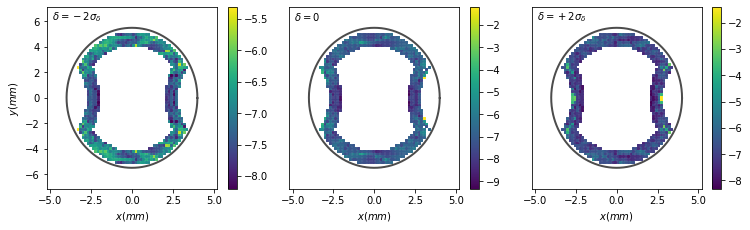

In [17]:
txt = [r'$\delta=-2\sigma_{\delta}$',r'$\delta=0$',r'$\delta=+2\sigma_{\delta}$']
fig = plt.figure(figsize=[4+3.3+3.3,3.3])
for i in range(3):
    plt.subplot(1,3,i+1)
    d = np.log10(diff[i])
    x = pTest[indx[i],0]
    y = pTest[indx[i],1]
    f1=plt.scatter(x*1e3,y*1e3,c=d,s=3.5,marker='s')
    plt.scatter(x*1e3,-y*1e3,c=d,s=3.5,marker='s')
    plt.plot(ap1_x*c*1e3,ap1_y*s*1e3,alpha=0.7,c='k',lw=2)
    plt.xlim(-ap1_x*1.3*1e3,ap1_x*1.3*1e3)
    plt.ylim(-ap1_y*1.3*1e3,ap1_y*1.3*1e3)
    plt.xlabel('$x (mm)$')
    if i==0:
        plt.ylabel('$y (mm)$')
    else:
        plt.yticks([])
    plt.text(-4.9,6.1,txt[i])
    plt.colorbar(f1)
plt.tight_layout()

In [18]:
diffSum0, diffSum1

(array([6.49224121e-05, 6.48539270e-02, 4.43833542e-02]),
 array([6.49224121e-05, 3.23038081e-01, 4.43833542e-02]))

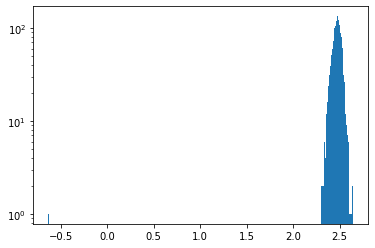

In [27]:
loader = torch.utils.data.DataLoader(regular_data, batch_size=len(regular_data), shuffle=False)
for tmp in loader:
    plt.hist(tmp[:,-1],bins=500,log=True)